In [1]:
import cv2
import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

from datetime import datetime

from skimage.morphology import skeletonize
from skimage.morphology import thin
from skimage import data
from skimage.util import invert
from skimage.color import rgb2gray
from skimage.feature import hog
from skimage.transform import resize

In [2]:
def get_hog_features(in_img):

    MAX_ROW_SIZE = 100
    
    # first resize the image
    if in_img.shape[0] > MAX_ROW_SIZE:
        resized_img = resize(
            in_img, 
            (
                MAX_ROW_SIZE, 
                int( ((1.0*MAX_ROW_SIZE)/in_img.shape[0]) * in_img.shape[1] )  
            )
        )
    else:
        resized_img = in_img
        
    fd, hog_image = hog(
        resized_img, 
        orientations=9, 
        pixels_per_cell=(2, 2),
        cells_per_block=(2, 2), 
        visualize=True
    )
    
    return hog_image


def flatten_hog_version(frames):
    return [get_hog_features(f).flatten() for f in frames]


def flatten_objSeg_version(frames):
    return [get_hog_features(f).flatten() for f in frames]

In [3]:
def to_df_hog_only(
    df,
    save_path
):
    df = df.copy()
    
    i = 0
    prev_progress = 0
    size = len(df)
    
    res = []
    for index, row in df.iterrows():
        
        hog = get_hog_features(row["image"])
        res.append(hog)

        i += 1
        cur_progress = int((i+1)*100/size)
        if cur_progress >= prev_progress + 2:
            print(f"progress: {cur_progress}%")
            print(f"processing {index} at {datetime.now()}")
            prev_progress = cur_progress
            
    df["image"] = res
    df.to_pickle(save_path)

    return df

In [4]:
from nebula.common import write_pickle, read_pickle, display

In [5]:
image_pickle_path = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_hard_df.pkl'
hog_pickle_path = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_hard_df_hog.pkl'

In [6]:
df = read_pickle(image_pickle_path)

In [7]:
hog1 = get_hog_features(df["image"].iloc[0])

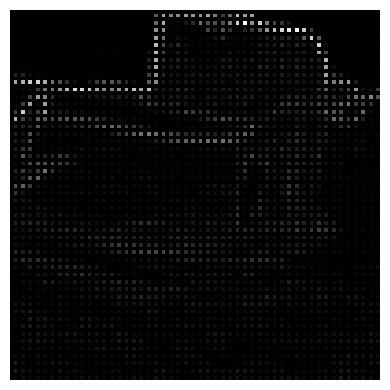

In [8]:
display(hog1)

In [9]:
hog_df = to_df_hog_only(df, hog_pickle_path)

progress: 2%
processing 398 at 2023-04-12 17:56:01.961503
progress: 4%
processing 798 at 2023-04-12 17:58:12.609812
progress: 6%
processing 1198 at 2023-04-12 18:00:45.339218
progress: 8%
processing 1598 at 2023-04-12 18:03:06.625242
progress: 10%
processing 1998 at 2023-04-12 18:05:30.697958
progress: 12%
processing 2398 at 2023-04-12 18:07:47.101543
progress: 14%
processing 2798 at 2023-04-12 18:10:09.101508
progress: 16%
processing 3198 at 2023-04-12 18:12:43.192626
progress: 18%
processing 3598 at 2023-04-12 18:15:05.860135
progress: 20%
processing 3998 at 2023-04-12 18:17:48.304351
progress: 22%
processing 4398 at 2023-04-12 18:20:23.686119
progress: 24%
processing 4798 at 2023-04-12 18:23:02.174403
progress: 26%
processing 5198 at 2023-04-12 18:25:32.713430
progress: 28%
processing 5598 at 2023-04-12 18:28:02.058278
progress: 30%
processing 5998 at 2023-04-12 18:30:45.697648
progress: 32%
processing 6398 at 2023-04-12 18:33:28.955446
progress: 34%
processing 6798 at 2023-04-12 18